In [32]:
## Import libraries
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
## Load cleaned data
players_df_clean = pd.read_csv('Data/cleaned_players_21.csv')

In [34]:
## Select features and target
features = [
    'age', 'height_cm', 'weight_kg',
    'pace', 'shooting', 'passing',
    'dribbling', 'defending', 'physic'
]

X = players_df_clean[features]
y = players_df_clean['value_eur']

In [35]:
## Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
## Train the model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
## Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 1757477.1076343039
R² Score: 0.9032430357818223


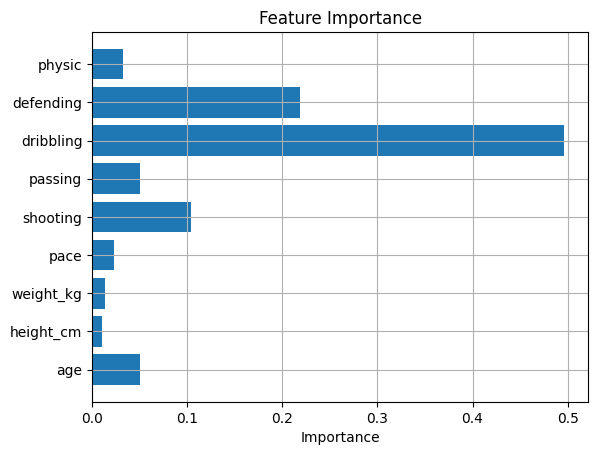

In [38]:
## Visualize feature importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.grid(True)
plt.savefig("figures/feature_importance_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [39]:
## Save model
import joblib
joblib.dump(model, "model/fifa_value_model.pkl")

['model/fifa_value_model.pkl']